In [62]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [63]:
data = pd.read_csv("./dataset.csv", index_col='date')

# Display the first few rows to verify changes
data.head()

data.describe()

,Temperature,Humidity,Light,CO2
count,9752.000000,9752.000000,9752.000000,9752.000000
mean,21.001768,29.891910,123.067930,753.224832
std,1.020693,3.952844,208.221275,297.096114
min,19.500000,21.865000,0.000000,484.666667
25%,20.290000,26.642083,0.000000,542.312500
50%,20.790000,30.200000,0.000000,639.000000
75%,21.533333,32.700000,208.250000,831.125000
max,24.390000,39.500000,1581.000000,2076.500000


In [64]:
# Splitting the dataset into training and testing sets
train_size = int(len(data) * 0.7)
train, test = data.iloc[:train_size], data.iloc[train_size:]

train

,Temperature,Humidity,Light,CO2
date,,,,
2/11/2015 14:48,21.7600,31.133333,437.333333,1029.666667
2/11/2015 14:49,21.7900,31.000000,437.333333,1000.000000
2/11/2015 14:50,21.7675,31.122500,434.000000,1003.750000
2/11/2015 14:51,21.7675,31.122500,439.000000,1009.500000
2/11/2015 14:51,21.7900,31.133333,437.333333,1005.666667
...,...,...,...,...
2/16/2015 8:29,20.3900,24.290000,14.000000,819.000000
2/16/2015 8:30,20.3900,24.290000,14.000000,819.000000
2/16/2015 8:31,20.4450,24.340000,14.000000,823.000000


In [65]:
# Check for stationarity in the CO2 data
adf_result= adfuller(train["CO2"])


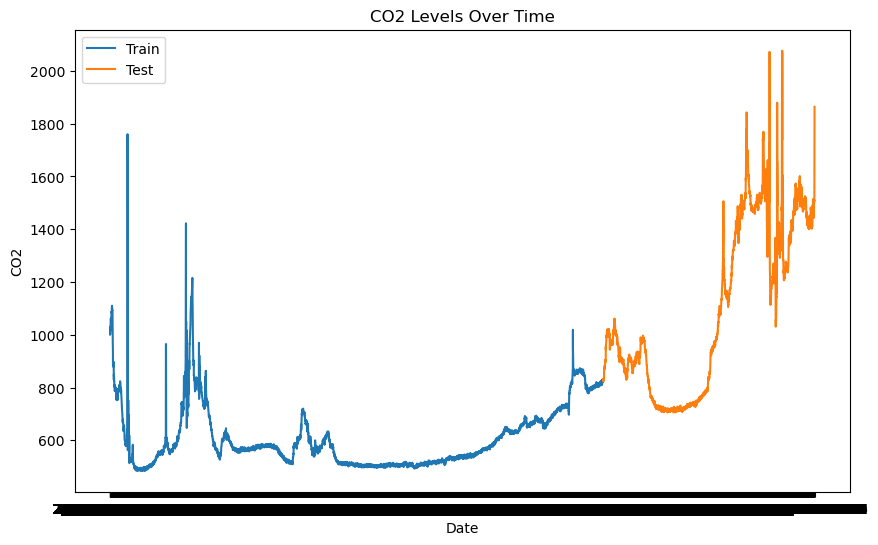

(-4.289931796058798,
 0.000462387497321171,
 24,
 6801,
 {'1%': -3.4313118835294487,
  '5%': -2.8619650732864534,
  '10%': -2.56699626275952},
 58841.84296674194)

In [66]:
# Plot the CO2 data
plt.figure(figsize=(10, 6))
plt.plot(train['CO2'], label='Train')
plt.plot(test['CO2'], label='Test')
plt.title('CO2 Levels Over Time')
plt.xlabel('Date')
plt.ylabel('CO2')
plt.legend()
plt.show()

adf_result


In [67]:
from pmdarima import auto_arima

 


In [68]:
print(train['CO2'])
train1 = train['CO2']
#train1
auto_model= auto_arima(train1, seasonal=False, trace=True, error_action="ignore", suppress_warnings=True)
auto_model.summary()

date
2/11/2015 14:48    1029.666667
2/11/2015 14:49    1000.000000
2/11/2015 14:50    1003.750000
2/11/2015 14:51    1009.500000
2/11/2015 14:51    1005.666667
                      ...     
2/16/2015 8:29      819.000000
2/16/2015 8:30      819.000000
2/16/2015 8:31      823.000000
2/16/2015 8:31      828.666667
2/16/2015 8:32      822.500000
Name: CO2, Length: 6826, dtype: float64
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=59233.687, Time=3.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=60029.820, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=59997.355, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=59979.849, Time=0.89 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=60027.837, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=59312.969, Time=2.81 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=59244.234, Time=2.21 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=59234.998, Time=8.02 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept  

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6826
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -29610.883
Date:                Mon, 01 Jan 2024   AIC                          59231.767
Time:                        18:19:31   BIC                          59265.909
Sample:                             0   HQIC                         59243.547
                               - 6826                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9575      0.008    124.925      0.000       0.943       0.973
ar.L2         -0.3979      0.007    -60.767      0.000      -0.411      -0.385
ma.L1         -0.9648      0.008   -116.149      0.000      -0.981      -0.949
ma.L2          0.1666      0.008     19.984      0.000       0.150       0.183
sigma2       343.5178      0.225   1524.480      0.000     343.076     343.959
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):         689791308.86
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.03   Skew:                            24.25
Prob(H) (two-sided):                  0.00   Kurtosis:                      1559.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [69]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt


In [70]:
data.index.freq= "1min"
data.index=pd.DatetimeIndex(data.index).to_period("1min")
temp_data = data['CO2']
split_point= int(0.7*len(temp_data))
print(split_point)
train_fit, test_fit = temp_data[:split_point], temp_data[split_point:]



6826


In [71]:
model = ARIMA(train_fit, order=(2,1,2))
fitted_model = model.fit()


In [72]:
forecast = fitted_model.forecast(steps=len(test))


In [73]:
train.index= train_fit.index.to_timestamp()
test.index =test_fit.index.to_timestamp()
forecast.index = forecast.index.to_timestamp()


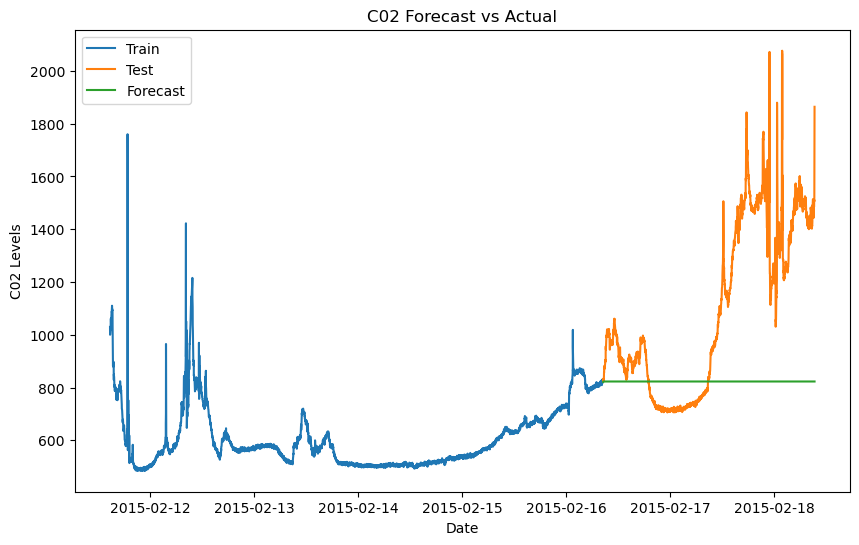

(2926,) (2926, 4)


In [74]:
 #Compare the forecasted values with the actual values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train_fit, label='Train')
plt.plot(test.index, test_fit, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.title('C02 Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('C02 Levels')
plt.legend()
plt.show()

print(forecast.shape, test.shape)
